In [35]:
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import datetime
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 


import os, sys
file_dir = '/Users/imsoyoung/Soyoung/Ajou/Project/DigitalPhenotype/DigitalPhenotype_overall/Code/Util'
sys.path.append(os.path.dirname(os.path.abspath
                                (os.path.abspath(file_dir))))

import Util.Utility as util
import json

# Count, Duration Feature Extraction

1. Category related features
    - count of each category in a day (Using categorized data)
    - transition count of category (Using categorized data)
    - duration of each category in a day (Using time_mapped data)


In [3]:
app = pd.read_csv('../01.Preprocess/result/A_categorized.csv')
util.toDatetime(app, ['date'], '%Y%m%d')
app.head()

,Unnamed: 0,_id,uid,date,stime,etime,packageName,total,isInUsable,packageFullName,category
0,2,3,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:11:59,2018-12-03 00:12:10,캐시워크,11,True,com.cashwalk.cashwalk,Health & Fitness
1,17,20,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:13:21,2018-12-03 00:13:24,카카오톡,3,True,com.kakao.talk,Communication
2,19,22,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:13:32,2018-12-03 00:13:33,카카오톡,1,True,com.kakao.talk,Communication
3,55,70,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:24:26,2018-12-03 00:24:53,카카오톡,27,True,com.kakao.talk,Communication
4,82,113,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:33:29,2018-12-03 00:42:48,Facebook,559,True,com.facebook.katana,Communication


## Count, Transition, Duration of category

In [4]:
count = app.groupby(['date', 'category'])['_id'].count().reset_index()
count.head()

,date,category,_id
0,2018-12-03,Background,19
1,2018-12-03,Comics,2
2,2018-12-03,Communication,70
3,2018-12-03,Education,3
4,2018-12-03,Entertainment,5


In [5]:
cat_unique = list(set(count['category']))
len(cat_unique)

16

### Category 별 사용 횟수 (Count)

0 Food & Drink
1 Comics
2 Music
3 Business
4 Finance
5 Shopping
6 Education
7 Health & Fitness
8 Communication
9 Lifestyle
10 Travel & Local
11 Photography
12 Productivity
13 Books & Reference
14 Entertainment
15 Background


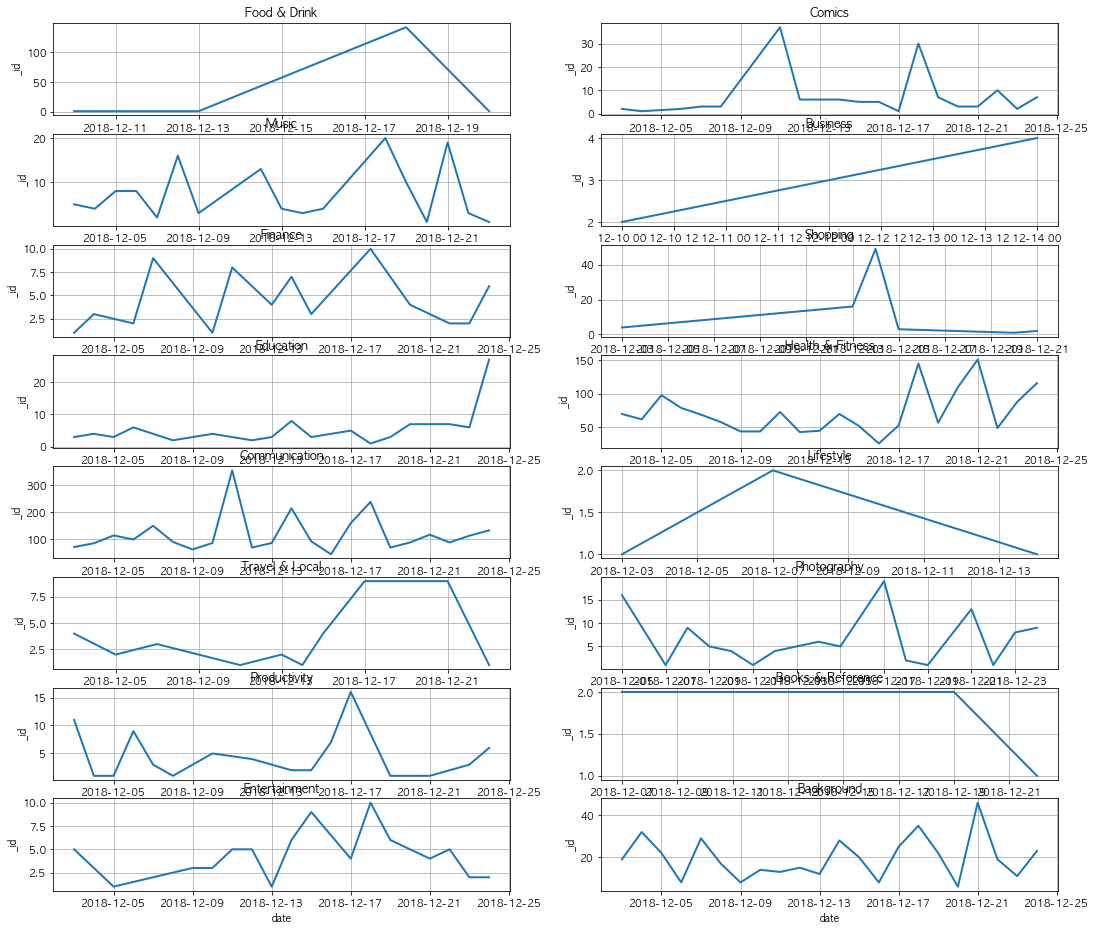

In [36]:
plt.figure(figsize=(18, 18))

for cat in enumerate(cat_unique):
    print(cat[0], cat[1])
    plt.subplot(9,2,cat[0]+1)
    dataset = count[count['category'] == cat[1]]
    ax1 = sns.lineplot(data = dataset, x = 'date', y='_id')
    plt.title(cat[1])
    
    

### Transition

- to count how many user transit category
1. next_category = shit(-1) 
2. compare current vs next_category of each row

In [7]:
app.head(3)

,Unnamed: 0,_id,uid,date,stime,etime,packageName,total,isInUsable,packageFullName,category
0,2,3,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:11:59,2018-12-03 00:12:10,캐시워크,11,True,com.cashwalk.cashwalk,Health & Fitness
1,17,20,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:13:21,2018-12-03 00:13:24,카카오톡,3,True,com.kakao.talk,Communication
2,19,22,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:13:32,2018-12-03 00:13:33,카카오톡,1,True,com.kakao.talk,Communication


In [8]:
tmp = app.copy()
tmp['next_category'] = tmp['category'].shift(-1)
tmp['transition'] = tmp.apply(lambda row: True if row['category']== row['next_category'] else False, axis=1)

In [38]:
tmp.head()

,Unnamed: 0,_id,uid,date,stime,etime,packageName,total,isInUsable,packageFullName,category,next_category,transition
0,2,3,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:11:59,2018-12-03 00:12:10,캐시워크,11,True,com.cashwalk.cashwalk,Health & Fitness,Communication,False
1,17,20,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:13:21,2018-12-03 00:13:24,카카오톡,3,True,com.kakao.talk,Communication,Communication,True
2,19,22,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:13:32,2018-12-03 00:13:33,카카오톡,1,True,com.kakao.talk,Communication,Communication,True
3,55,70,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:24:26,2018-12-03 00:24:53,카카오톡,27,True,com.kakao.talk,Communication,Communication,True
4,82,113,otfKOMf7VUaB5lxUARO0HNusxPB2,2018-12-03,2018-12-03 00:33:29,2018-12-03 00:42:48,Facebook,559,True,com.facebook.katana,Communication,Communication,True


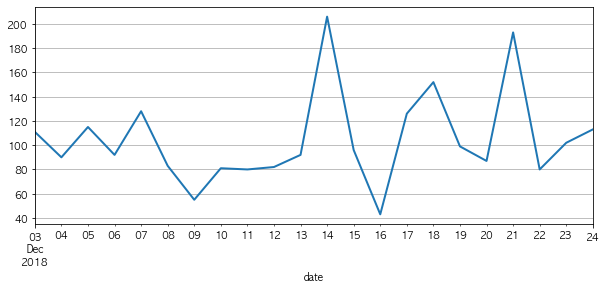

In [39]:
tmp_transition = tmp[tmp['transition'] != True]
tmp_transition.groupby(['date'])['transition'].count().plot()

### Duration

# App Log as Text --> LDA

- 💡LDA
  * 유저의 앱 사용 기록을 카테고리화 (google-play store)
  * 유저의 일별 모든 앱 사용의 카테고리를 하나의 문서로 취급
  * LDA 적용: 일별 앱 사용을 문서화 하여, 일별 앱 사용 패턴의 Topic 도출
  * ISSUE : Communication 카테고리의 사용 count 가 너무 많음


  (file : Code/02.Feature Extraction/LDA_TopicModeling)


# App Log as Graph


